In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

### load data

In [3]:
data=np.loadtxt("data.txt")
t=data[:,0]
sig=data[:,1]
noise=data[:,2]

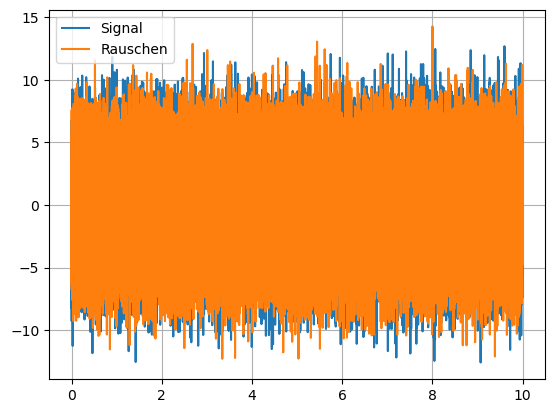

In [5]:
plt.plot(t,sig, label = "Signal")
plt.plot(t, noise, label = "Rauschen")
plt.grid()
plt.legend()

## Frage 1

3.0106421325962094


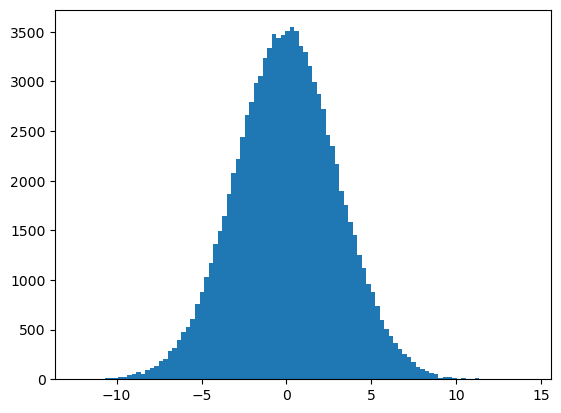

In [9]:
plt.hist(noise, bins = 100)
sigmaTest = np.std(noise)
print(sigmaTest)

## Frage 2

Text(0.5, 1.0, 'PSD')

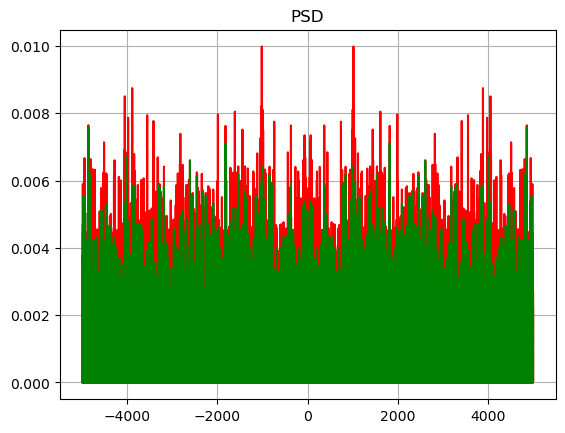

In [37]:
from numpy.fft import fft, fftfreq
N=len(t)
dt = t[1] - t[0]
#N2=100
fftx = fft(noise)/N
psd = dt*N*np.abs(fftx)**2
#psd2=dt*N*fftx.real**2
freqs=fftfreq(N,dt)
idx=np.argsort(freqs)
plt.plot(freqs[idx],psd[idx],'-r')
#plt.plot(freqs[idx],psd2[idx],'-g')
#plt.yscale('log')
plt.grid()
plt.title("PSD")


In [33]:
avgPSD=np.mean(psd)
print(avgPSD)
print(np.round(avgPSD,2))

0.000906396849661754
0.0


In [34]:
s_idx=np.argsort(-psd)
print(psd[s_idx[:6]])
print(freqs[s_idx[:6]])


[0.00998461 0.00998461 0.00874716 0.00874716 0.00850296 0.00850296]
[-1016.4  1016.4  3889.2 -3889.2 -4054.3  4054.3]


[0.00497746 0.00439615 0.00432213]
[1132.8125 1718.75   2968.75  ]


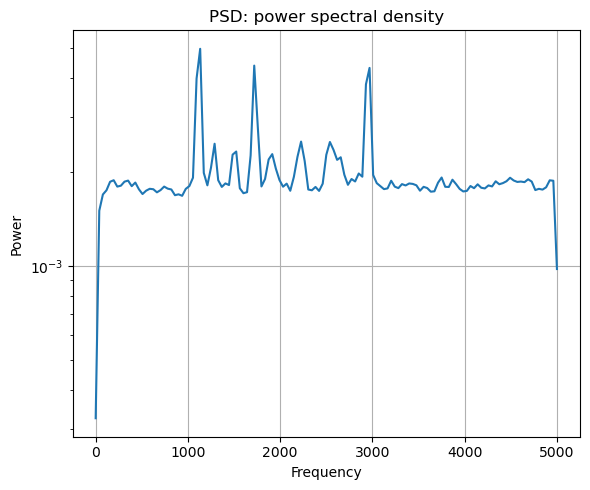

In [36]:
wfreqs, wpsd = scipy.signal.welch(sig,1/dt)

plt.figure(figsize=(6, 5))
#plt.semilogx(wfreqs, wpsd)
plt.semilogy(wfreqs, wpsd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.grid()

s_idx=np.argsort(-wpsd)
print(wpsd[s_idx[:3]])
print(wfreqs[s_idx[:3]])


## Frage 3

In [27]:
v_sig=np.var(sig)
v_noise=np.var(noise)
v_sig_alleine=v_sig-v_noise
print("v sig=", v_sig)
print("v sig alleine=", v_sig_alleine)
print(np.var(sig-noise))

v sig= 9.886888710399864
v sig alleine= 0.8229226598364114
18.86454673679172
